# Introduction

In this project, you will build a neural network of your own design to evaluate the MNIST dataset.

Some of the benchmark results on MNIST include can be found [on Yann LeCun's page](https://webcache.googleusercontent.com/search?q=cache:stAVPik6onEJ:yann.lecun.com/exdb/mnist) and include:

88% [Lecun et al., 1998](https://hal.science/hal-03926082/document)

95.3% [Lecun et al., 1998](https://hal.science/hal-03926082v1/document)

99.65% [Ciresan et al., 2011](http://people.idsia.ch/~juergen/ijcai2011.pdf)


MNIST is a great dataset for sanity checking your models, since the accuracy levels achieved by large convolutional neural networks and small linear models are both quite high. This makes it important to be familiar with the data.

## Installation

In [1]:
# Update the PATH to include the user installation directory. 
import os
os.environ['PATH'] = f"{os.environ['PATH']}:/root/.local/bin"

# Restart the Kernel before you move on to the next step.

#### Important: Restart the Kernel before you move on to the next step.

In [1]:
# Install requirements
!python -m pip install -r requirements.txt

Defaulting to user installation because normal site-packages is not writeable
     |████████████████████████████████| 37.1 MB 1.3 MB/s eta 0:00:01
     |████████████████████████████████| 19.3 MB 34.8 MB/s eta 0:00:01
     |████████████████████████████████| 21.0 MB 76.0 MB/s eta 0:00:01
     |████████████████████████████████| 76 kB 7.5 MB/s  eta 0:00:01
     |████████████████████████████████| 123 kB 81.4 MB/s eta 0:00:01
     |████████████████████████████████| 297 kB 81.8 MB/s eta 0:00:01
     |████████████████████████████████| 11.3 MB 65.1 MB/s eta 0:00:01
     |████████████████████████████████| 292 kB 83.2 MB/s eta 0:00:01
     |████████████████████████████████| 109 kB 66.3 MB/s eta 0:00:01
     |████████████████████████████████| 1.6 MB 74.7 MB/s eta 0:00:01
     |████████████████████████████████| 98 kB 13.1 MB/s eta 0:00:01
     |████████████████████████████████| 121 kB 83.5 MB/s eta 0:00:01
     |████████████████████████████████| 93 kB 2.8 MB/s  eta 0:00:01
  Created wheel for bokeh

## Imports

In [2]:
## This cell contains the essential imports you will need – DO NOT CHANGE THE CONTENTS! ##
import torch
import torch.nn as nn
import torch.nn.functional as F
import torch.optim as optim
import torchvision
import torchvision.transforms as transforms
import matplotlib.pyplot as plt
import numpy as np

## Load the Dataset

Specify your transforms as a list if you intend to .
The transforms module is already loaded as `transforms`.

MNIST is fortunately included in the torchvision module.
Then, you can create your dataset using the `MNIST` object from `torchvision.datasets` ([the documentation is available here](https://pytorch.org/vision/stable/datasets.html#mnist)).
Make sure to specify `download=True`! 

Once your dataset is created, you'll also need to define a `DataLoader` from the `torch.utils.data` module for both the train and the test set.

In [3]:
# Define transforms
transform = transforms.Compose([
    transforms.ToTensor(),
    transforms.Normalize((0.1307,), (0.3081,))
])

# Create full training set
full_train_set = torchvision.datasets.MNIST(root='./data', train=True, download=True, transform=transform)

# Calculate the size of training and validation sets
train_size = int(0.8 * len(full_train_set))
val_size = len(full_train_set) - train_size

# Split the training dataset into training and validation sets
train_set, val_set = torch.utils.data.random_split(full_train_set, [train_size, val_size])

# Define training and validation data loaders
train_loader = torch.utils.data.DataLoader(train_set, batch_size=64, shuffle=True)
val_loader = torch.utils.data.DataLoader(val_set, batch_size=64, shuffle=False)

# Create test set and define test data loader
test_set = torchvision.datasets.MNIST(root='./data', train=False, download=True, transform=transform)
test_loader = torch.utils.data.DataLoader(test_set, batch_size=64, shuffle=False)

Failed to download (trying next):
HTTP Error 403: Forbidden



  0%|          | 0/9912422 [00:00<?, ?it/s]

Extracting ./data/MNIST/raw/train-images-idx3-ubyte.gz to ./data/MNIST/raw

Failed to download (trying next):
HTTP Error 403: Forbidden



  0%|          | 0/28881 [00:00<?, ?it/s]

Extracting ./data/MNIST/raw/train-labels-idx1-ubyte.gz to ./data/MNIST/raw

Failed to download (trying next):
HTTP Error 403: Forbidden



  0%|          | 0/1648877 [00:00<?, ?it/s]

Extracting ./data/MNIST/raw/t10k-images-idx3-ubyte.gz to ./data/MNIST/raw

Failed to download (trying next):
HTTP Error 403: Forbidden



  0%|          | 0/4542 [00:00<?, ?it/s]

Extracting ./data/MNIST/raw/t10k-labels-idx1-ubyte.gz to ./data/MNIST/raw



## Justify your preprocessing

In your own words, why did you choose the transforms you chose? If you didn't use any preprocessing steps, why not?

I chose to apply two main preprocessing steps to the MNIST dataset: converting images to tensors and normalizing their pixel values. Here's why:

1. **Conversion to Tensors**: I converted the images from PIL format to PyTorch tensors using `transforms.ToTensor()`. This conversion is essential as it allows us to work with the images as tensors within the PyTorch framework. Tensors are the primary data structure used in PyTorch for efficient computation, making them suitable for feeding into neural networks.

2. **Normalization**: I normalized the pixel values of the images using `transforms.Normalize((0.1307,), (0.3081,))`. Normalization is a common preprocessing technique used to scale the input data to a similar range, which can aid in faster convergence during training and more stable optimization. The chosen mean and standard deviation values (0.1307 and 0.3081, respectively) are specific to the MNIST dataset and have been precomputed based on its characteristics. By subtracting the mean and dividing by the standard deviation for each pixel, we ensure that the pixel values are approximately centered around zero with a standard deviation of one. This normalization helps prevent issues such as exploding or vanishing gradients and ensures that the model learns robust features from the input data.

These preprocessing steps were chosen to prepare the MNIST dataset for training our neural network model effectively, enabling better convergence, stability, and performance during training and evaluation.


## Explore the Dataset
Using matplotlib, numpy, and torch, explore the dimensions of your data.

You can view images using the `show5` function defined below – it takes a data loader as an argument.
Remember that normalized images will look really weird to you! You may want to try changing your transforms to view images.
Typically using no transforms other than `toTensor()` works well for viewing – but not as well for training your network.
If `show5` doesn't work, go back and check your code for creating your data loaders and your training/test sets.

In [4]:
## This cell contains a function for showing 5 images from a dataloader – DO NOT CHANGE THE CONTENTS! ##
def show5(img_loader):
    dataiter = iter(img_loader)
    
    batch = next(dataiter)
    labels = batch[1][0:5]
    images = batch[0][0:5]
    for i in range(5):
        print(int(labels[i].detach()))
    
        image = images[i].numpy()
        plt.imshow(image.T.squeeze().T)
        plt.show()

Training set size: 48000
Test set size: 10000
Sample image dimensions: torch.Size([1, 28, 28])
1


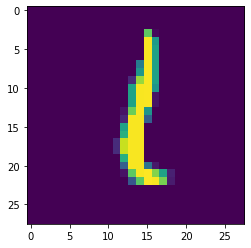

3


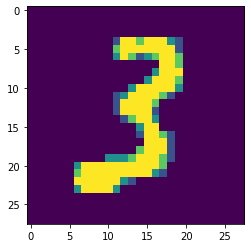

6


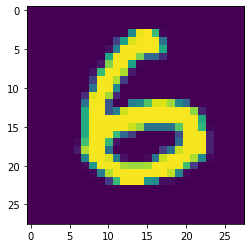

6


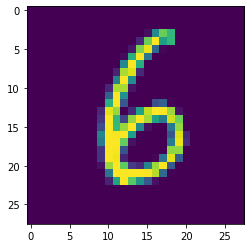

2


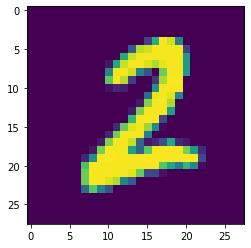

In [5]:
# Explore data
print("Training set size:", len(train_set))
print("Test set size:", len(test_set))

# Print dimensions of a sample image
sample_image, sample_label = train_set[0]
print("Sample image dimensions:", sample_image.shape)

# Visualize 5 sample images
show5(train_loader)

## Build your Neural Network
Using the layers in `torch.nn` (which has been imported as `nn`) and the `torch.nn.functional` module (imported as `F`), construct a neural network based on the parameters of the dataset.
Use any architecture you like. 

*Note*: If you did not flatten your tensors in your transforms or as part of your preprocessing and you are using only `Linear` layers, make sure to use the `Flatten` layer in your network!

In [6]:
class NeuralNetwork(nn.Module):
    def __init__(self):
        """
        Initialize the neural network architecture.
        """
        super(NeuralNetwork, self).__init__()
        self.flatten = nn.Flatten()  # Flatten layer to flatten the input image
        self.fc1 = nn.Linear(28*28, 128)  # First fully connected layer with 128 output features
        self.fc2 = nn.Linear(128, 64)  # Second fully connected layer with 64 output features
        self.fc3 = nn.Linear(64, 10)  # Final fully connected layer with 10 output features (classes)
    
    def forward(self, x):
        """
        Forward pass of the neural network.
        """
        x = self.flatten(x)  # Flatten the input image
        x = F.relu(self.fc1(x))  # Apply ReLU activation to the first layer output
        x = F.relu(self.fc2(x))  # Apply ReLU activation to the second layer output
        x = self.fc3(x)  # Final layer output (logits)
        return F.log_softmax(x, dim=1)  # Apply log softmax activation to obtain class probabilities

# Instantiate the model
model = NeuralNetwork()


Specify a loss function and an optimizer, and instantiate the model.

If you use a less common loss function, please note why you chose that loss function in a comment.

In [7]:
# Specify loss function
loss_function = nn.CrossEntropyLoss()  # Cross Entropy Loss for multi-class classification tasks

# Specify optimizer
optimizer = optim.Adam(model.parameters(), lr=0.001)  # Adam optimizer with learning rate 0.001

## Running your Neural Network
Use whatever method you like to train your neural network, and ensure you record the average loss at each epoch. 
Don't forget to use `torch.device()` and the `.to()` method for both your model and your data if you are using GPU!

If you want to print your loss **during** each epoch, you can use the `enumerate` function and print the loss after a set number of batches. 250 batches works well for most people!

In [8]:
device = torch.device("cuda" if torch.cuda.is_available() else "cpu")  # Use GPU if available, otherwise use CPU
model.to(device)  # Move model to the selected device

num_epochs = 10  # Number of epochs for training
train_losses = []  # List to store training losses
val_losses = []  # List to store validation losses

# Training loop
for epoch in range(num_epochs):
    epoch_train_loss = 0.0  # Accumulator for the training loss in this epoch
    
    # Training
    model.train()  # Set model to training mode
    for i, data in enumerate(train_loader, 0):
        inputs, labels = data[0].to(device), data[1].to(device)  # Move inputs and labels to the selected device
        
        # Zero the parameter gradients
        optimizer.zero_grad()
        
        # Forward pass
        outputs = model(inputs)
        loss = loss_function(outputs, labels)
        
        # Backward pass and optimize
        loss.backward()
        optimizer.step()
        
        epoch_train_loss += loss.item()  # Accumulate the training loss
    
    # Calculate average training loss for this epoch
    epoch_train_loss /= len(train_loader)
    train_losses.append(epoch_train_loss)  # Append the epoch training loss to the list
    
    print('[%d/%d] Epoch Training Loss: %.4f' % (epoch + 1, num_epochs, epoch_train_loss))
    
    # Validation
    model.eval()  # Set model to evaluation mode
    with torch.no_grad():  # No gradient calculation during validation
        val_loss = 0.0
        for data in val_loader:
            inputs, labels = data[0].to(device), data[1].to(device)  # Move inputs and labels to the selected device
            outputs = model(inputs)
            val_loss += loss_function(outputs, labels).item()
        
        val_loss /= len(val_loader)
        val_losses.append(val_loss)
        print('Epoch [%d/%d], Validation Loss: %.4f' % (epoch+1, num_epochs, val_loss))


[1/10] Epoch Training Loss: 0.2923
Epoch [1/10], Validation Loss: 0.1467
[2/10] Epoch Training Loss: 0.1186
Epoch [2/10], Validation Loss: 0.1142
[3/10] Epoch Training Loss: 0.0810
Epoch [3/10], Validation Loss: 0.1021
[4/10] Epoch Training Loss: 0.0628
Epoch [4/10], Validation Loss: 0.1025
[5/10] Epoch Training Loss: 0.0506
Epoch [5/10], Validation Loss: 0.0975
[6/10] Epoch Training Loss: 0.0411
Epoch [6/10], Validation Loss: 0.1039
[7/10] Epoch Training Loss: 0.0334
Epoch [7/10], Validation Loss: 0.1000
[8/10] Epoch Training Loss: 0.0288
Epoch [8/10], Validation Loss: 0.1195
[9/10] Epoch Training Loss: 0.0260
Epoch [9/10], Validation Loss: 0.1009
[10/10] Epoch Training Loss: 0.0214
Epoch [10/10], Validation Loss: 0.1250


Plot the training loss (and validation loss/accuracy, if recorded).

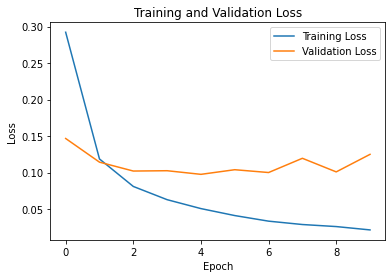

In [9]:
# Plotting the training and validation loss
plt.plot(train_losses, label='Training Loss')
plt.plot(val_losses, label='Validation Loss')
plt.xlabel('Epoch')
plt.ylabel('Loss')
plt.title('Training and Validation Loss')
plt.legend()
plt.show()

## Testing your model
Using the previously created `DataLoader` for the test set, compute the percentage of correct predictions using the highest probability prediction. 

If your accuracy is over 90%, great work, but see if you can push a bit further! 
If your accuracy is under 90%, you'll need to make improvements.
Go back and check your model architecture, loss function, and optimizer to make sure they're appropriate for an image classification task.

In [10]:
correct = 0
total = 0

# Set model to evaluation mode
model.eval()

# Disable gradient calculation during testing
with torch.no_grad():
    for data in test_loader:
        inputs, labels = data[0].to(device), data[1].to(device)  # Move inputs and labels to the selected device
        outputs = model(inputs)
        _, predicted = torch.max(outputs.data, 1)  # Get index of the max log-probability
        total += labels.size(0)
        correct += (predicted == labels).sum().item()

# Compute accuracy
accuracy = 100 * correct / total
print('Accuracy on the test set: {:.2f}%'.format(accuracy))

Accuracy on the test set: 96.95%


## Improving your model

Once your model is done training, try tweaking your hyperparameters and training again below to improve your accuracy on the test set!

In [11]:
# Improved model architecture with BatchNorm and Dropout
class ImprovedNet(nn.Module):
    def __init__(self):
        super(ImprovedNet, self).__init__()
        self.Convolutional_layers = nn.Sequential(
            nn.Conv2d(in_channels=1, out_channels=32, kernel_size=3, padding=1),
            nn.BatchNorm2d(32),
            nn.ReLU(),
            nn.MaxPool2d(kernel_size=2, stride=2),
            nn.Conv2d(in_channels=32, out_channels=64, kernel_size=3, padding=1),
            nn.BatchNorm2d(64),
            nn.ReLU(),
            nn.MaxPool2d(kernel_size=2, stride=2)
        )

        self.Linear_layers = nn.Sequential(
            nn.Linear(64 * 7 * 7, 256),
            nn.ReLU(),
            nn.Dropout(0.5),
            nn.Linear(256, 128),
            nn.ReLU(),
            nn.Dropout(0.3),
            nn.Linear(128, 10)
        )

    def forward(self, x):
        x = self.Convolutional_layers(x)
        x = torch.flatten(x, 1)
        x = self.Linear_layers(x)
        return x

# Instantiate the improved net
net_tuned = ImprovedNet()

In [12]:
# Define device
device = torch.device("cuda" if torch.cuda.is_available() else "cpu")
net_tuned.to(device)

# Loss function and optimizer
criterion_tuned = nn.CrossEntropyLoss()
optimizer_tuned = optim.Adam(net_tuned.parameters(), lr=0.001, weight_decay=1e-5)

# Learning rate scheduler
scheduler = optim.lr_scheduler.StepLR(optimizer_tuned, step_size=5, gamma=0.5)


In [13]:
# Train the model
epochs = 15
train_losses = []
validation_losses = []
accuracy_tuned = []

for epoch in range(epochs):
    net_tuned.train()
    train_loss = 0.0

    for images, labels in train_loader:
        images, labels = images.to(device), labels.to(device)
        optimizer_tuned.zero_grad()
        outputs = net_tuned(images)
        loss = criterion_tuned(outputs, labels)
        loss.backward()
        optimizer_tuned.step()
        train_loss += loss.item()
    
    train_losses.append(train_loss / len(train_loader))
    
    # Evaluate the model on the validation set
    net_tuned.eval()
    validation_loss = 0.0
    correct = 0
    total = 0

    with torch.no_grad():
        for images, labels in test_loader:
            images, labels = images.to(device), labels.to(device)
            outputs = net_tuned(images)
            loss = criterion_tuned(outputs, labels)
            validation_loss += loss.item()
            _, predicted = torch.max(outputs.data, 1)
            total += labels.size(0)
            correct += (predicted == labels).sum().item()
    
    validation_losses.append(validation_loss / len(val_loader))
    accuracy_tuned.append(correct / total)

    print(f"Epoch [{epoch+1}/{epochs}], "
          f"Train Loss: {train_loss / len(train_loader):.4f}, "
          f"Validation Loss: {validation_loss / len(val_loader):.4f}, "
          f"Validation Accuracy: {(correct / total) * 100:.2f}%")


Epoch [1/15], Train Loss: 0.2505, Validation Loss: 0.0440, Validation Accuracy: 98.36%
Epoch [2/15], Train Loss: 0.0970, Validation Loss: 0.0338, Validation Accuracy: 98.69%
Epoch [3/15], Train Loss: 0.0792, Validation Loss: 0.0261, Validation Accuracy: 99.02%
Epoch [4/15], Train Loss: 0.0632, Validation Loss: 0.0268, Validation Accuracy: 99.01%
Epoch [5/15], Train Loss: 0.0554, Validation Loss: 0.0234, Validation Accuracy: 99.18%
Epoch [6/15], Train Loss: 0.0486, Validation Loss: 0.0268, Validation Accuracy: 99.01%
Epoch [7/15], Train Loss: 0.0486, Validation Loss: 0.0239, Validation Accuracy: 99.08%
Epoch [8/15], Train Loss: 0.0408, Validation Loss: 0.0274, Validation Accuracy: 99.03%
Epoch [9/15], Train Loss: 0.0369, Validation Loss: 0.0250, Validation Accuracy: 99.12%
Epoch [10/15], Train Loss: 0.0330, Validation Loss: 0.0253, Validation Accuracy: 99.23%
Epoch [11/15], Train Loss: 0.0307, Validation Loss: 0.0219, Validation Accuracy: 99.26%
Epoch [12/15], Train Loss: 0.0299, Valida

In [14]:
# Test the model
net_tuned.eval()
test_loss = 0.0
correct = 0
total = 0

with torch.no_grad():
    for images, labels in test_loader:
        images, labels = images.to(device), labels.to(device)
        outputs = net_tuned(images)
        loss = criterion_tuned(outputs, labels)
        test_loss += loss.item()
        _, predicted = torch.max(outputs.data, 1)
        total += labels.size(0)
        correct += (predicted == labels).sum().item()

# Print test loss and accuracy
print(f"Test Loss: {test_loss / len(test_loader):.4f}")
print(f"Test Accuracy: {(correct / total) * 100:.2f}%")

Test Loss: 0.0270
Test Accuracy: 99.23%


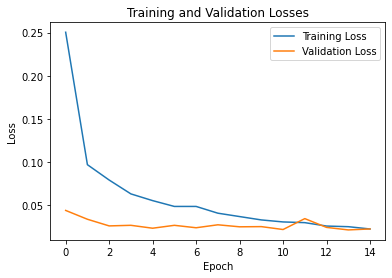

In [15]:
# Plot training and validation losses
plt.plot(train_losses, label='Training Loss')
plt.plot(validation_losses, label='Validation Loss')
plt.xlabel('Epoch')
plt.ylabel('Loss')
plt.title('Training and Validation Losses')
plt.legend()
plt.show()


## Saving your model
Using `torch.save`, save your model for future loading.

In [16]:
model_path = 'mnist_handwritten_digits_classifier_with_Pytorch.pth'
torch.save(net_tuned.state_dict(), model_path)
print(f"Model saved to '{model_path}'")

Model saved to 'mnist_handwritten_digits_classifier_with_Pytorch.pth'
